In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
movies = pd.read_csv("../cleaned_data/cleaned_movies.csv")
ratings = pd.read_csv("../cleaned_data/cleaned_ratings.csv")

I have to find the average rating of each genre, 
then I want to find the average movie rating per every 10 years.

In [10]:
# get average ratings per movie
avg_ratings = ratings.groupby("movieId")["rating"].mean()

avg_ratings

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

avg_ratings just has movieId and ratings. I will now merge avg_ratings with movies.

then I have to do something with the years of each movie.

the movies are in () at the end of the title so it could look something like finding the length of each title and subtracting by 5 then scan through the end of the string for the years.

I have to think how I want to sort them by the years, I could do a year_id that i can apply to each movie.

In [13]:

# merge movies and avg_ratings
movies_avg_ratings = pd.merge(movies, avg_ratings, on="movieId")

movies_avg_ratings.drop("Unnamed: 0", axis=1)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9721,193585,Flint (2017),Drama,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


I want to add a decade column to each movie that identifies the movie with a decade.

Ex: Toy story would be in the 90s, and will have a decade of "90s".
Should I leave it a string or convert to int? I think string is fine but its a bit messy.

It would make it easier than creating a new index.

need to find the year of each movie now

In [26]:
movies_avg_ratings["year"] = movies_avg_ratings["title"].str[-5:-1]

movies_avg_ratings["year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9719    2017
9720    2017
9721    2017
9722    2018
9723    1991
Name: year, Length: 9724, dtype: object

then convert the year to a decade in tge new decade column

In [37]:
movies_avg_ratings["decade"] =( movies_avg_ratings["year"].str[:3]+ '0').astype(str) + 's'

In [40]:
movies_avg_ratings.drop("Unnamed: 0", axis=1)

,movieId,title,genres,rating,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995,1990s
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995,1990s
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995,1990s
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995,1990s
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995,1990s
...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017,2010s
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017,2010s
9721,193585,Flint (2017),Drama,3.500000,2017,2010s
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018,2010s


Alright so now i have a decade column that i can use to groupby.

In [51]:
decades_ratings = movies_avg_ratings.groupby("decade").agg({"rating":"mean"}).reset_index()

In [52]:
decades_ratings

,decade,rating
0,Ba0s,1.000000
1,Ro0s,2.000000
2,0070s,4.250000
3,0080s,2.750000
4,0110s,2.750000
5,0120s,5.000000
6,0140s,4.000000
7,1900s,3.333333
8,1910s,3.250000
9,1920s,3.635368


So clearly got some false data in here that I have to rid of.

Make a year list with appropriate years. check each year in decade_ratings and see if its an appropriate year and if not then delete that row.

In [45]:
years = ["1900s", "1910s", "1920s", "1930s", "1940s", "1950s", 
         "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

In [60]:
decades_ratings = decades_ratings[decades_ratings["decade"].isin(years)]

In [61]:
decades_ratings

,decade,rating
7,1900s,3.333333
8,1910s,3.250000
9,1920s,3.635368
10,1930s,3.593552
11,1940s,3.637786
12,1950s,3.575472
13,1960s,3.534353
14,1970s,3.499550
15,1980s,3.169981
16,1990s,3.156164


Okay cool so now there is only valid decades 1900s-2010s because the data is from like 2018 or something

Now to plot it.

/var/folders/_b/wwq21lgj60n56gm2gb2n93sw0000gn/T/ipykernel_49869/1200316696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="decade", y="rating", data=decades_ratings, palette="viridis")


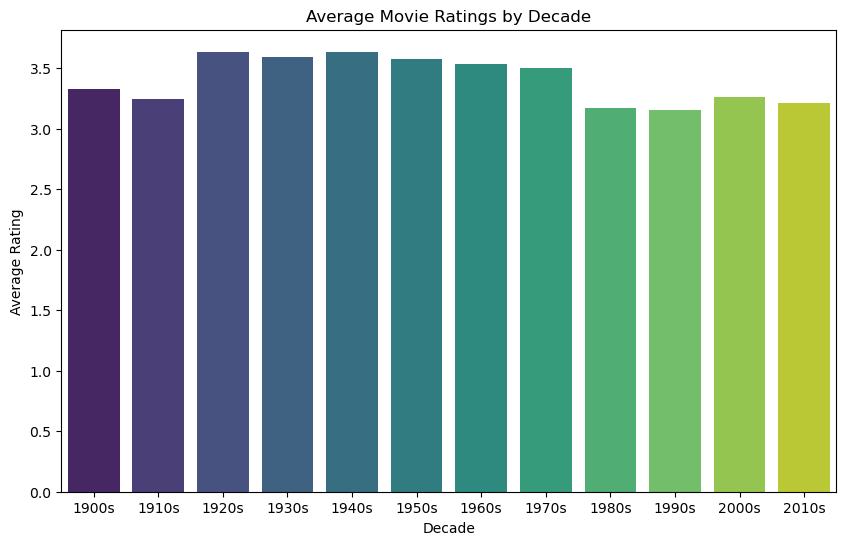

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x="decade", y="rating", data=decades_ratings, palette="viridis")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Decade")
# plt.xticks(rotation=60)
plt.show()